# 
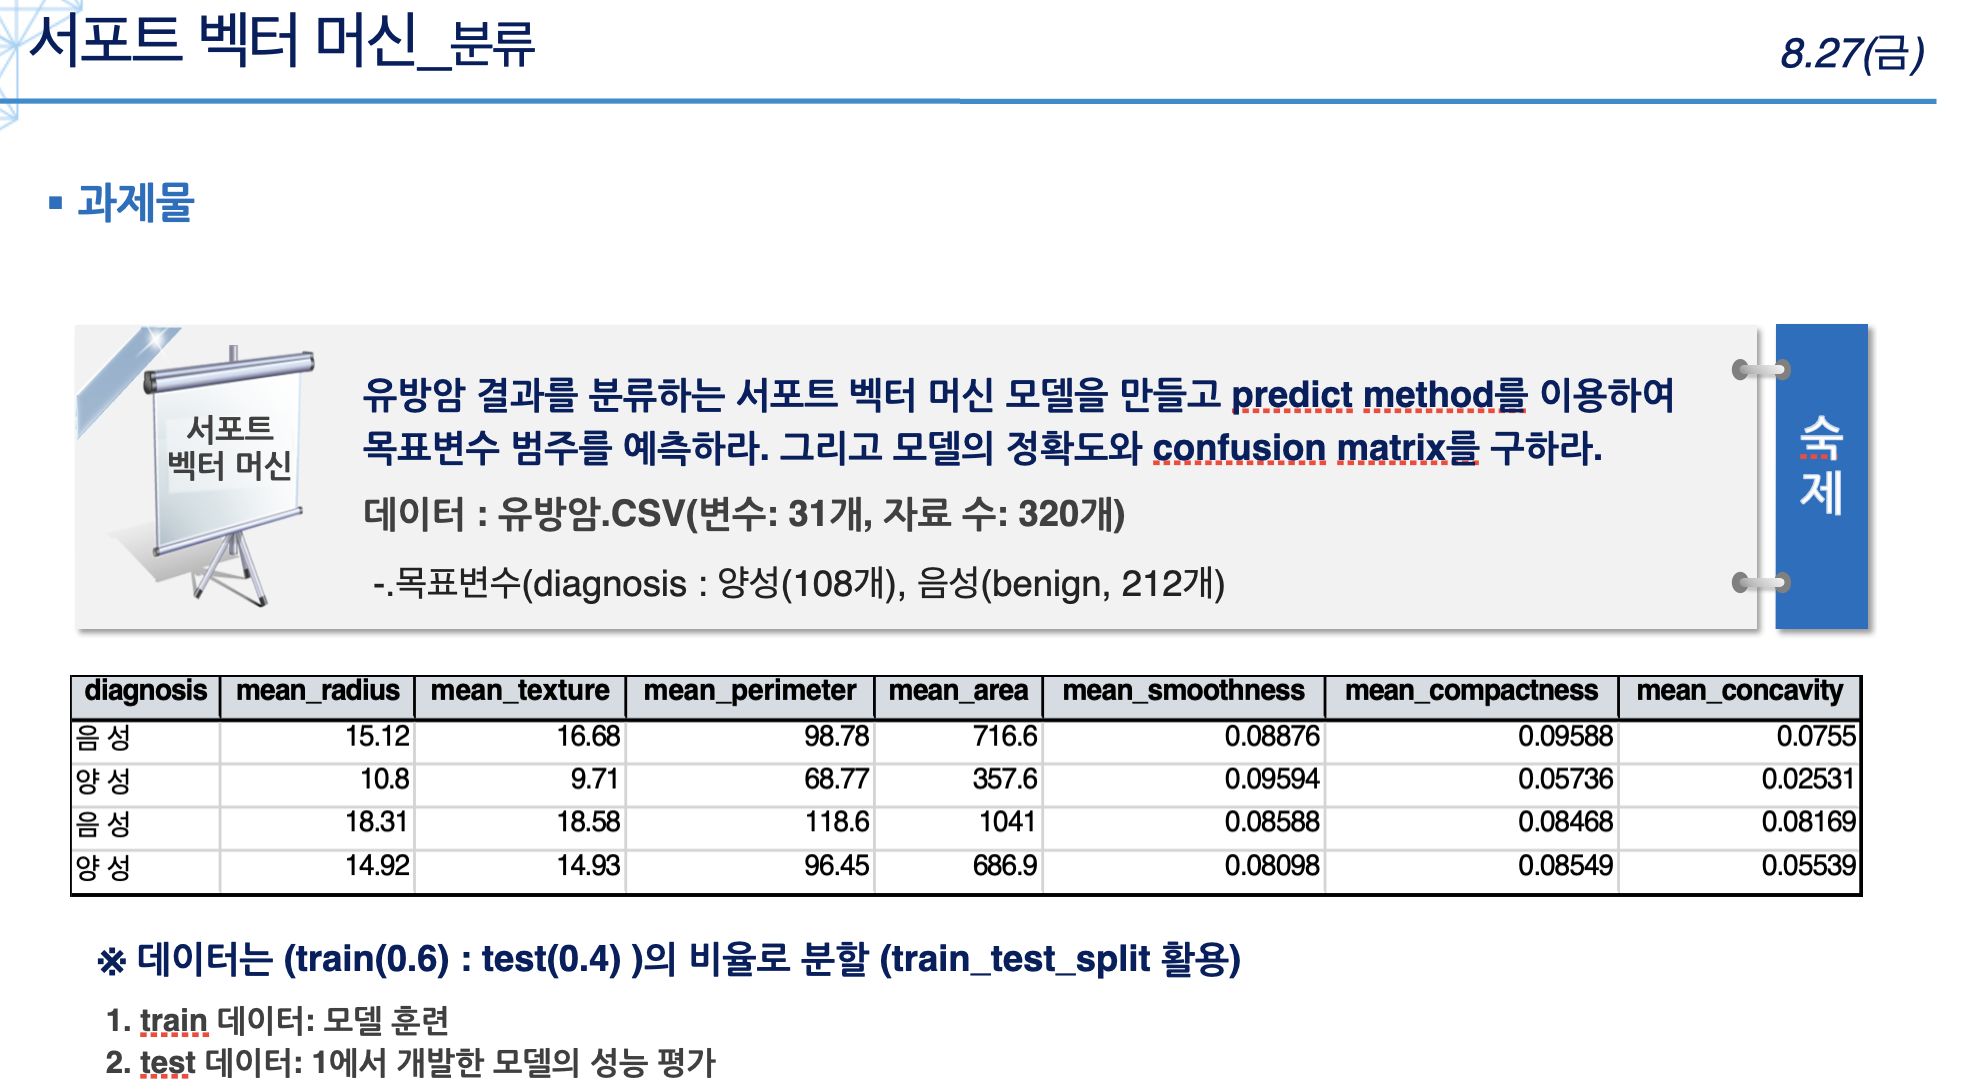

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline
matplotlib.rc('font', family='AppleGothic')
plt.rc('font',  family='AppleGothic')
plt.rcParams['axes.unicode_minus']=False

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.svm import SVC


# 1.Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞

In [5]:
## Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±ÌïòÍ∏∞
df_raw = pd.read_csv('../data/Ïú†Î∞©Ïïî.csv', engine='python', encoding='cp949')
df_raw.head(n=3)

diagnosis  mean_radius  mean_texture  mean_perimeter  mean_area  \
0        ÏùåÏÑ±        15.12         16.68           98.78      716.6   
1        ÏñëÏÑ±        10.80          9.71           68.77      357.6   
2        ÏùåÏÑ±        18.31         18.58          118.60     1041.0   

   mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
0          0.08876           0.09588         0.07550              0.04079   
1          0.09594           0.05736         0.02531              0.01698   
2          0.08588           0.08468         0.08169              0.05814   

   mean_symmetry  ...  worst_radius  worst_texture  worst_perimeter  \
0         0.1594  ...         17.77          20.24           117.70   
1         0.1381  ...         11.60          12.02            73.66   
2         0.1621  ...         21.31          26.36           139.20   

   worst_area  worst_smoothness  worst_compactness  worst_concavity  \
0       989.5            0.1491             0.3331           0.3327   
1       414.0            0.1436             0.1257           0.1047   
2      1410.0            0.1234             0.2445           0.3538   

   worst_concave_points  worst_symmetry  worst_fractal_dimension  
0               0.12520          0.3415                  0.09740  
1               0.04603          0.2090                  0.07699  
2               0.15710          0.3206                  0.06938  

[3 rows x 31 columns]

# 2.Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨: objectÌòï Î™©ÌëúÎ≥ÄÏàòÎ•º Ïà´ÏûêÌòïÏúºÎ°ú Î≥ÄÍ≤Ω 

In [6]:
df_raw.replace({'diagnosis': 'ÏñëÏÑ±'}, 1, inplace=True)
df_raw.replace({'diagnosis': 'ÏùåÏÑ±'}, 0, inplace=True)

df_raw_y=df_raw["diagnosis"]
df_raw_x=df_raw.drop("diagnosis",axis=1,inplace=False)

# train, test Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±
## randomstate(Ï¥àÍ∏∞ ÏûêÎ£å ÏÑ†ÌÉù Í∏∞Ï§Ä)Î•º 100ÏúºÎ°ú Î≥ÄÍ≤Ω


### Ïù¥Ïú†:
CostÏóê Îî∞Î•∏ accuracy Î≥ÄÌôî Ïã§ÌóòÏãú,

randomstate=1234Î°ú Î∂ÑÎ•òÌïú train, test Îç∞Ïù¥ÌÑ∞Î°ú Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÎ©¥ testÎç∞Ïù¥ÌÑ∞ trainÎç∞Ïù¥ÌÑ∞Î≥¥Îã§ ÎÜíÏùÄ Íµ¨Í∞ÑÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.


Ïù¥ Î¨∏Ï†úÎ•º Ìï¥Í≤∞ÌïòÍ∏∞ ÏúÑÌï¥, randomstate(Ï¥àÍ∏∞ ÏûêÎ£å ÏÑ†ÌÉù Í∏∞Ï§Ä)Î•º 100ÏúºÎ°ú Î≥ÄÍ≤ΩÌïòÏó¨ Îã§Î•∏ train, test Îç∞Ïù¥ÌÑ∞Î•º ÏÑ†ÌÉùÌïòÍ≥†, SVC Î™®Îç∏ÏùÑ ÌïôÏäµÌïòÍ∏∞Î°ú Í≤∞Ï†ïÌñàÏäµÎãàÎã§.

In [7]:
# Îç∞Ïù¥ÌÑ∞ Íµ¨ÏÑ±ÌïòÍ∏∞ - Îç∞Ïù¥ÌÑ∞ Î∂ÑÌï†
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=100)
print("train data X size :{}".format(df_train_x.shape))
print("train data Y size :{}".format(df_train_y.shape))
print("test data X size :{}".format(df_test_x.shape))
print("test data Y size :{}".format(df_test_y.shape))

train data X size :(224, 30)
train data Y size :(224,)
test data X size :(96, 30)
test data Y size :(96,)


# 3. SVC Î™®Îç∏ ÏÉùÏÑ±



## hyper parameter ÌäúÎãù Ï†Ñ Î™®Îç∏ Ï†ïÌôïÎèÑ

#### randomstate(Ï¥àÍ∏∞ ÏûêÎ£å ÏÑ†ÌÉù Í∏∞Ï§Ä)Î•º 100ÏúºÎ°ú Î≥ÄÍ≤Ω

Accuracy on svm_uncustomized training set:0.902
Accuracy on svm_uncustomized test set:0.875

In [8]:
svm_uncustomized=SVC(random_state=100)
svm_uncustomized.fit(df_train_x,df_train_y)

#train Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm_uncustomized training set:{:.3f}".format(svm_uncustomized.score(df_train_x,df_train_y)))
#test Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm_uncustomized test set:{:.3f}".format(svm_uncustomized.score(df_test_x,df_test_y)))

Accuracy on svm_uncustomized training set:0.902
Accuracy on svm_uncustomized test set:0.875


# 4-1. Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 1: Cost =>0.8ÏÑ†ÌÉù

## 4-1-1. Cost(0.01~10)Ïóê Îî∞Î•∏ accuracy Î≥ÄÌôî


costÍ∞Ä 1Ïù¥ÌïòÏù∏ Í≤ΩÏö∞ train, test Ï†ïÌôïÎèÑÍ∞Ä Í∏âÍ≤©Ìûà ÎÜíÏïÑÏßÑÎã§. 


costÍ∞Ä 1Ïù¥ÏÉÅÏù∏ Í≤ΩÏö∞ Î™®Îç∏ Ï†ïÌôïÎèÑÎäî train Îç∞Ïù¥ÌÑ∞Ïóê Í≥ºÏ†ÅÌï© ÎêòÍ≥†, test Îç∞Ïù¥ÌÑ∞Ïóê Î≥ÄÌôîÍ∞Ä ÏóÜÎã§.


Îî∞ÎùºÏÑú costÍ∞Ä 1Ïù¥ÌïòÏù∏ Íµ¨Í∞ÑÏóê ÎåÄÌïú Ï∂îÍ∞Ä Ï°∞ÏÇ¨Î•º ÌÜµÌï¥ ÌååÎùºÎ©îÌÑ∞Î•º ÏÑ†Ï†ïÌïòÏòÄÏäµÎãàÎã§.

Cost = 0.8ÏóêÏÑú train, test Ï†ïÌôïÎèÑ Ï∞®Ïù¥Í∞Ä ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê ÏÑ†Ï†ïÌïòÏòÄÏäµÎãàÎã§.


In [9]:
train_accuracy = []; test_accuracy =[]
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=100)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["Train Accuracy"]=train_accuracy
df_accuracy_c["Test Accuracy"]=test_accuracy

In [10]:
df_accuracy_c.round(3)

C  Train Accuracy  Test Accuracy
0   0.01           0.665          0.656
1   0.10           0.893          0.865
2   1.00           0.902          0.875
3  10.00           0.929          0.865

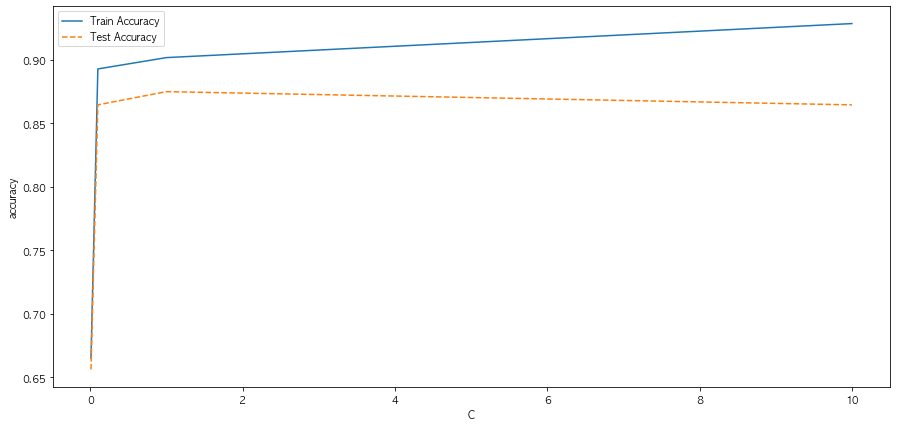

In [11]:
plt.figure(figsize=(15,7))
plt.plot(para_c,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle='--',label="Test Accuracy")
# plt.axvline(x=1, linestyle='--', c='r', label='Ï£ºÏÑ±Î∂Ñ 2Î≤à')
plt.ylabel("accuracy");plt.xlabel("C")
plt.legend()

## 4-1-2. Cost (0.1~2)Ïóê Îî∞Î•∏ accuracy Î≥ÄÌôî

Cost = 0.8ÏóêÏÑú train, test Ï†ïÌôïÎèÑ Ï∞®Ïù¥Í∞Ä ÏûëÍ∏∞ ÎïåÎ¨∏Ïóê ÏÑ†Ï†ïÌïòÏòÄÏäµÎãàÎã§.


In [12]:
train_accuracy = []; test_accuracy =[]
para_c = [c*0.1 for c in range(1,20)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=100)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["Train Accuracy"]=train_accuracy
df_accuracy_c["Test Accuracy"]=test_accuracy

In [13]:
df_accuracy_c.round(3)

C  Train Accuracy  Test Accuracy
0   0.1           0.893          0.865
1   0.2           0.897          0.875
2   0.3           0.897          0.875
3   0.4           0.902          0.875
4   0.5           0.902          0.875
5   0.6           0.902          0.875
6   0.7           0.902          0.875
7   0.8           0.897          0.875
8   0.9           0.902          0.875
9   1.0           0.902          0.875
10  1.1           0.902          0.875
11  1.2           0.902          0.875
12  1.3           0.906          0.875
13  1.4           0.906          0.875
14  1.5           0.911          0.875
15  1.6           0.911          0.875
16  1.7           0.911          0.875
17  1.8           0.911          0.875
18  1.9           0.911          0.875

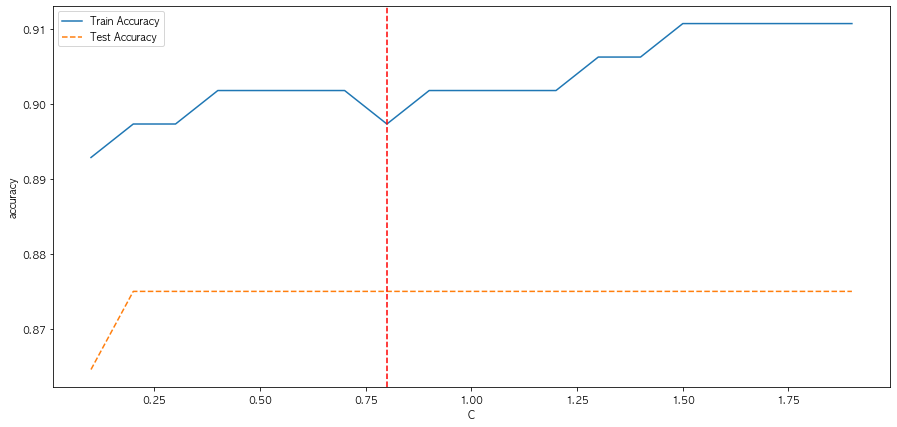

In [14]:
plt.figure(figsize=(15,7))
plt.plot(para_c,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle='--',label="Test Accuracy")
plt.axvline(x=0.8, linestyle='--', c='r')
plt.ylabel("accuracy");plt.xlabel("C")
plt.legend()

# 4-2.Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï 2: gamma =>ÏòÅÌñ• ÏóÜÏúºÎØÄÎ°ú default Í∞í ÏÑ†ÌÉù

- gammaÌååÎùºÎ©îÌÑ∞ÎûÄ?

gammaÎäî Îç∞Ïù¥ÌÑ∞Ïùò ÏòÅÌñ•Î†•Ïùò Í±∞Î¶¨ÏôÄ Î∞òÎπÑÎ°ÄÍ¥ÄÍ≥ÑÏù¥Îã§.

gammaÍ∞Ä ÌÅ¥ÏàòÎ°ù 1Í∞ú Îç∞Ïù¥ÌÑ∞Ïùò ÏòÅÌñ•Î†• Í±∞Î¶¨Í∞Ä ÏßßÏïÑÏ†∏ Í≥ºÏ†ÅÌï© ÏúÑÌóòÏù¥ ÏûàÎã§.

- ÏÑ†ÌÉù Ïù¥Ïú†

gammaÏóê Îî∞Î•∏ train, tset Ï†ïÌôïÎèÑÏùò Î≥ÄÌôîÍ∞Ä ÏóÜÎã§.



### SVC Î™®Îç∏Ïùò default ÏÑ§Ï†ïÍ∞í ÌôïÏù∏

In [22]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

## 4-2-1. gamma(0.01~10)Ïóê Îî∞Î•∏ accuracy Î≥ÄÌôî


In [35]:
train_accuracy = []; test_accuracy =[]
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,C=0.8,random_state=100)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    test_accuracy.append(svm.score(df_test_x,df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy

In [36]:
df_accuracy_gamma.round(4)

gamma  TrainAccuracy  TestAccuracy
0   0.01            1.0        0.6562
1   0.10            1.0        0.6562
2   1.00            1.0        0.6562
3  10.00            1.0        0.6562

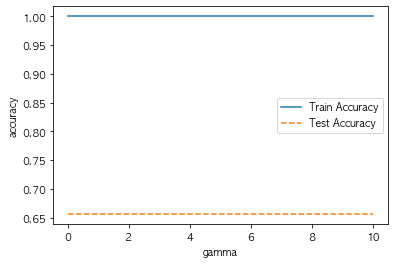

In [14]:
plt.plot(para_gamma,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle='--',label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()

# 5.Scale Î≥ÄÌôò

## ÌïÑÏöîÏÑ±:
SVMÏùÄ Î≥ÄÏàòÍ∞Ñ Í±∞Î¶¨Î•º Í∏∞Î∞òÏúºÎ°ú Îç∞Ïù¥ÌÑ∞ Íµ∞ÏùÑ ÎÇòÎàÑÎäî Î∞©Î≤ïÏù¥ÎØÄÎ°ú,

Î≥ÄÏàòÍ∞Ñ scale Ï∞®Ïù¥Í∞Ä ÌÅ∞ Í≤ΩÏö∞ Í≤∞Í≥º ÎèÑÏ∂úÏóê ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÎã§.

Îî∞ÎùºÏÑú ÏÑ§Î™ÖÎ≥ÄÏàò Í∞íÏùò Íµ¨Í∞ÑÏùÑ ÎèôÏùºÌïòÍ≤å Î≥ÄÌôòÌïòÎäî StandardscalerÎ•º Ï†ÅÏö©ÌïòÏòÄÎã§.

### Scale Î≥ÄÌôò Í≤∞Í≥º: ÌèâÍ∑†Ïù¥ 0,  ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 1Î°ú Î≥ÄÌôòÎêú Í≤ÉÏùÑ Ïïå Ïàò ÏûàÎã§.

In [15]:
v_feature_name = df_train_x.columns
scaler = StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.describe()

mean_radius  mean_texture  mean_perimeter     mean_area  \
count  3.200000e+02  3.200000e+02    3.200000e+02  3.200000e+02   
mean   2.532696e-16 -6.522560e-16   -2.844947e-16  7.320533e-17   
std    1.001566e+00  1.001566e+00    1.001566e+00  1.001566e+00   
min   -2.144078e+00 -2.560965e+00   -2.137206e+00 -1.628531e+00   
25%   -7.111638e-01 -6.908989e-01   -7.057591e-01 -7.252621e-01   
50%   -1.563406e-01 -2.612060e-02   -1.143788e-01 -2.419430e-01   
75%    7.514302e-01  5.252472e-01    7.171588e-01  6.835562e-01   
max    3.315649e+00  4.574242e+00    3.312564e+00  4.326655e+00   

       mean_smoothness  mean_compactness  mean_concavity  mean_concave_points  \
count     3.200000e+02      3.200000e+02    3.200000e+02         3.200000e+02   
mean      1.131734e-15     -4.649059e-17    1.131040e-16        -1.651457e-16   
std       1.001566e+00      1.001566e+00    1.001566e+00         1.001566e+00   
min      -3.284486e+00     -1.689536e+00   -1.442260e+00        -1.607458e+00   
25%      -6.409206e-01     -7.374164e-01   -8.191610e-01        -8.985510e-01   
50%      -5.541402e-02     -1.392174e-01   -1.333628e-01        -4.108234e-02   
75%       6.109248e-01      5.672238e-01    5.597562e-01         5.952241e-01   
max       4.501416e+00      3.889336e+00    3.597318e+00         3.221391e+00   

       mean_symmetry  mean_fractal_dimension  ...  worst_radius  \
count   3.200000e+02            3.200000e+02  ...  3.200000e+02   
mean    4.066192e-16            8.829742e-16  ...  1.644518e-16   
std     1.001566e+00            1.001566e+00  ...  1.001566e+00   
min    -2.163524e+00           -1.771699e+00  ... -1.906495e+00   
25%    -7.241279e-01           -7.283403e-01  ... -7.508361e-01   
50%    -7.731061e-02           -1.718356e-01  ... -1.570138e-01   
75%     5.804388e-01            5.608839e-01  ...  7.494228e-01   
max     4.271853e+00            4.842278e+00  ...  3.381761e+00   

       worst_texture  worst_perimeter    worst_area  worst_smoothness  \
count   3.200000e+02     3.200000e+02  3.200000e+02      3.200000e+02   
mean    1.130866e-15     3.129441e-16 -6.661338e-17     -1.204592e-15   
std     1.001566e+00     1.001566e+00  1.001566e+00      1.001566e+00   
min    -2.517236e+00    -1.914321e+00 -1.421712e+00     -2.234131e+00   
25%    -6.540078e-01    -7.714095e-01 -7.499304e-01     -6.445040e-01   
50%    -5.721191e-02    -1.217590e-01 -2.566707e-01      1.596124e-02   
75%     6.144939e-01     7.138043e-01  6.328921e-01      5.808470e-01   
max     3.694077e+00     3.564468e+00  4.876011e+00      3.647983e+00   

       worst_compactness  worst_concavity  worst_concave_points  \
count       3.200000e+02     3.200000e+02          3.200000e+02   
mean        1.346145e-16    -7.910339e-17         -1.644518e-16   
std         1.001566e+00     1.001566e+00          1.001566e+00   
min        -1.476710e+00    -1.648315e+00         -2.165421e+00   
25%        -7.341324e-01    -7.938634e-01         -8.129523e-01   
50%        -1.815506e-01    -6.154336e-02          1.073604e-01   
75%         5.542250e-01     6.106452e-01          7.682083e-01   
max         4.282831e+00     3.816063e+00          2.165812e+00   

       worst_symmetry  worst_fractal_dimension  
count    3.200000e+02             3.200000e+02  
mean     1.713907e-16             1.817990e-16  
std      1.001566e+00             1.001566e+00  
min     -2.145534e+00            -1.602209e+00  
25%     -6.699070e-01            -6.825086e-01  
50%     -1.342341e-01            -2.252776e-01  
75%      3.324944e-01             5.282929e-01  
max      5.179179e+00             6.003840e+00  

[8 rows x 30 columns]

## Scale Î≥ÄÌôò Ïù¥Ï†Ñ Îç∞Ïù¥ÌÑ∞ÏôÄ, cost=0.8Î°ú ÌïôÏäµÌïú Î™®Îç∏Ïùò Ï†ïÌôïÎèÑ

In [25]:
svm_original = SVC(C=0.8,random_state=100)
svm_original.fit(df_train_x,df_train_y)

#train Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm scale Ïù¥Ï†Ñ training set:{:.3f}".format(svm_original.score(df_train_x,df_train_y)))
#test Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm scaled Ïù¥Ï†Ñ test set:{:.3f}".format(svm_original.score(df_test_x,df_test_y)))

Accuracy on svm scale Ïù¥Ï†Ñ training set:0.897
Accuracy on svm scaled Ïù¥Ï†Ñ test set:0.875


# 6.Scale Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î°ú SVM Î™®Îç∏ ÏÉùÏÑ±
## Scale Î≥ÄÌôòÎêú Îç∞Ïù¥ÌÑ∞Î°ú train, test Îç∞Ïù¥ÌÑ∞ ÏÉùÏÑ±

## Î™®Îç∏ Ï†ïÌôïÎèÑ

scaleÏùÑ Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞Ïùò train Ï†ïÌôïÎèÑÎäî 0.987ÏúºÎ°ú scaleÎ≥ÄÌôò Ï†Ñ 0.897Î≥¥Îã§ Ï¶ùÍ∞Ä,

scaleÏùÑ Ï†ÅÏö©Ìïú Îç∞Ïù¥ÌÑ∞Ïùò test Ï†ïÌôïÎèÑÎäî 0.969 scaleÎ≥ÄÌôò Ï†Ñ 0.875Î≥¥Îã§ Ï¶ùÍ∞ÄÌïòÏòÄÎã§.

In [18]:
df_scaled_train_x, df_scaled_test_x, = train_test_split(df_scaled, test_size = 0.3, random_state=100)
print("train data X szie {}".format(df_scaled_train_x.shape))
print("test data Y szie {}".format(df_scaled_test_x.shape))

train data X szie (224, 30)
test data Y szie (96, 30)


In [24]:
svm_scaled = SVC(random_state=100)
svm_scaled.fit(df_scaled_train_x,df_train_y)
#train Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm scale Ïù¥ÌõÑ training set:{:.3f}".format(svm_scaled.score(df_scaled_train_x,df_train_y)))
#test Îç∞Ïù¥ÌÑ∞ Ï†ïÌôïÎèÑ
print("Accuracy on svm_scale Ïù¥ÌõÑ test set:{:.3f}".format(svm_scaled.score(df_scaled_test_x,df_test_y)))

Accuracy on svm scale Ïù¥ÌõÑ training set:0.987
Accuracy on svm_scale Ïù¥ÌõÑ test set:0.969


# 7-1. Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï: Cost =>1ÏÑ†ÌÉù
train, test Ï†ïÌôïÎèÑÍ∞Ä 95% Ïù¥ÏÉÅÏúºÎ°ú ÎÜíÍ≥† train, test Ï†ïÌôïÎèÑ Ï∞®Ïù¥Í∞Ä ÏûëÏùÄ 1 ÏÑ†ÌÉù

In [60]:
train_accuracy = []; test_accuracy =[]
para_c = [10**c for c in range(-2,2)]

for v_C in para_c:
    svm = SVC(C=v_C,random_state=100)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
df_accuracy_c = pd.DataFrame()
df_accuracy_c["C"] = para_c
df_accuracy_c["TrainAccuracy"]=train_accuracy
df_accuracy_c["TestAccuracy"]=test_accuracy

In [61]:
df_accuracy_c.round(4)

C  TrainAccuracy  TestAccuracy
0   0.01         0.6652        0.6562
1   0.10         0.9375        0.9271
2   1.00         0.9866        0.9688
3  10.00         1.0000        0.9688

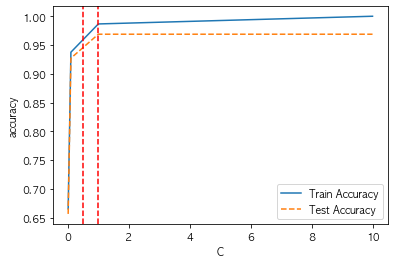

In [62]:
plt.plot(para_c,train_accuracy,linestyle='-',label="Train Accuracy")
plt.plot(para_c,test_accuracy,linestyle='--',label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("C")
plt.axvline(x=1, linestyle='--', c='r')
plt.axvline(x=0.5, linestyle='--', c='r')

plt.legend()

# 7-2.Î™®Îç∏ ÌååÎùºÎ©îÌÑ∞ Ï°∞Ï†ï : gamma =>ÏòÅÌñ• ÏóÜÏúºÎØÄÎ°ú default Í∞í ÏÑ†ÌÉù

gammaÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ÏÑú test Ï†ïÌôïÎèÑÍ∞Ä Í∏âÍ≤©Ìûà Í∞êÏÜåÌïòÎØÄÎ°ú 0.1ÏùÑ ÏÑ†ÌÉùÌñàÏäµÎãàÎã§.

## 7-2-1. gamma(0.01~10)Ïóê Îî∞Î•∏ accuracy Î≥ÄÌôî


In [41]:
train_accuracy = []; test_accuracy =[]
para_gamma = [10**gamma for gamma in range(-2,2)]

for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,C=1,random_state=100)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy

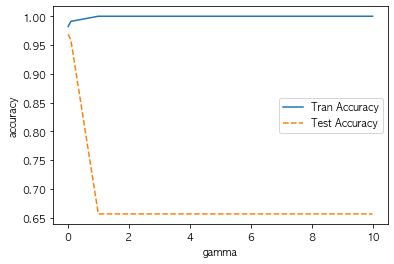

In [42]:
df_accuracy_c.round(3)
plt.plot(para_c,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_c,test_accuracy,linestyle='--',label="Test Accuracy")
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()

## 7-2-2. gamma(0.1~0.5)Ïóê Îî∞Î•∏ accuracy Î≥ÄÌôî
gammaÍ∞Ä Ï¶ùÍ∞ÄÌïòÎ©¥ÏÑú test Ï†ïÌôïÎèÑÍ∞Ä Í∏âÍ≤©Ìûà Í∞êÏÜåÌïòÎØÄÎ°ú 0.1ÏùÑ ÏÑ†ÌÉùÌñàÏäµÎãàÎã§.

In [51]:
train_accuracy = []; test_accuracy =[]
para_gamma = [gamma*0.1 for gamma in range(1,5)]


for v_gamma in para_gamma:
    svm = SVC(gamma=v_gamma,C=1,random_state=100)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(svm.score(df_scaled_test_x,df_test_y))
    
df_accuracy_gamma = pd.DataFrame()
df_accuracy_gamma["gamma"] = para_gamma
df_accuracy_gamma["TrainAccuracy"]=train_accuracy
df_accuracy_gamma["TestAccuracy"]=test_accuracy

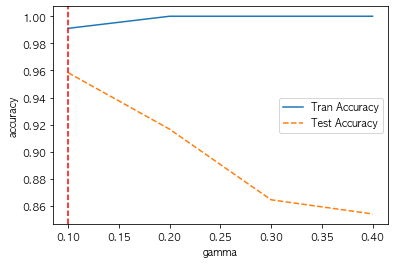

In [53]:
df_accuracy_c.round(3)
plt.plot(para_gamma,train_accuracy,linestyle='-',label="Tran Accuracy")
plt.plot(para_gamma,test_accuracy,linestyle='--',label="Test Accuracy")
plt.axvline(x=0.1, linestyle='--', c='r')
plt.ylabel("accuracy");plt.xlabel("gamma")
plt.legend()

# 8.ÏµúÏ¢Ö Î™®Îç∏: ÌïòÏù¥Ìçº ÌååÎùºÎ©îÌÑ∞ ( C =0.8, gamma=0.1 )

# ÏµúÏ¢Ö Î™®Îç∏ ÌèâÍ∞Ä

## üìåÌï¥ÏÑù: Ï†ïÌôïÎèÑ

C, gamma ÌååÎùºÎ©îÌÑ∞ ÌäúÎãùÌïú SVM Î™®Îç∏Ïùò test Ï†ïÌôïÎèÑÎäî 95.8%ÏúºÎ°ú ÌäúÎãù Ï†Ñ 96.9%Î≥¥Îã§ 1.1% Í∞êÏÜåÌïòÏòÄÎã§.

C, gamma ÌååÎùºÎ©îÌÑ∞ ÌäúÎãùÌïú SVM Î™®Îç∏ÏùÄ RandomForest Î™®Îç∏Ïùò test Ï†ïÌôïÎèÑ 95.5%Î≥¥Îã§ 0.3% Ï¶ùÍ∞ÄÌïòÏòÄÎã§.



## üìåÌï¥ÏÑù: f1-score
Î™©Ìëú Î≥ÄÏàò 1Í∏∞Ï§Ä f1-scoreÏùÄ 0.937ÏúºÎ°ú RandomForest Î™®Îç∏ Í≤∞Í≥ºÏù∏ 0.833Î≥¥Îã§ Ï¶ùÍ∞ÄÌïòÏòÄÎã§.

## üìåÍ≤∞Î°†: 
#### C, gamma ÌååÎùºÎ©îÌÑ∞ ÌäúÎãùÌïú SVM Î™®Îç∏Ïù¥ RandomForest Î™®Îç∏Î≥¥Îã§ AccuracyÏôÄ f1-scoreÏù¥ ÎÜíÏúºÎØÄÎ°ú Ïú†Î∞©Ïïî ÏñëÏÑ± ÏßÑÎã®Ïóê Îçî Ï¢ãÏùÄ Î™®Îç∏Ïù¥Îã§.


In [63]:
svc_final = SVC(gamma=0.1,C=0.8,random_state=100)
svc_final.fit(df_scaled_train_x,df_train_y)
y_pred = svc_final.predict(df_scaled_test_x)
print("Accuracy on training set:{:.3f}".format(svc_final.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(svc_final.score(df_scaled_test_x,df_test_y)))
print("\nAccuracy on test set\n:{}".format(confusion_matrix(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred,digits=3))

Accuracy on training set:0.991
Accuracy on test set:0.958

Accuracy on test set
:[[62  1]
 [ 3 30]]
              precision    recall  f1-score   support

           0      0.954     0.984     0.969        63
           1      0.968     0.909     0.937        33

    accuracy                          0.958        96
   macro avg      0.961     0.947     0.953        96
weighted avg      0.959     0.958     0.958        96



## GridSearchCVÎ•º ÌÜµÌïú Hyperparemter ÌÉêÏÉâÍ≥º Î™®Îç∏ Ï†ïÌôïÎèÑ
Ï†úÍ∞Ä ÏÑ§Ï†ïÌïú  ÌååÎùºÎ©îÌÑ∞ÏôÄ Í∞ôÏùÄ Ï†êÏùÄ gamma=0.1Ïù¥Î©∞,

Îã§Î•∏ Ï†êÏùÄ Îã§Î•∏ C=10Ïù∏ Í≤ÉÏûÖÎãàÎã§.

In [55]:
estimaotr = SVC(random_state=100)
param_grid={"C":para_c,"gamma":para_gamma}
grid_rf=GridSearchCV(estimaotr,param_grid,scoring="accuracy",n_jobs=-1)
grid_rf.fit(df_scaled_train_x,df_train_y)
print("best estimator model:\n{}".format(grid_rf.best_estimator_))
print("\nbest parameter:\n{}".format(grid_rf.best_params_))
print("\nbest score \n{}".format(grid_rf.best_score_.round(3)))

best estimator model:
SVC(C=10, gamma=0.1, random_state=100)

best parameter:
{'C': 10, 'gamma': 0.1}

best score 
0.933
